- Demonstrate-Search-Predict (DSP), with 'Py'thon

- Developed by SNLPG team, show the list  

- DSPy provides general purpose modules that replace string-based 
  prompting. DSPy also provides optimizers which can optimize these 
  modules with help of following

- What are the various modules DSPy has?
  Lang Models, Signatures, Modules, Data, Metrics, Optimizers, Assertions

- Can you talk about use cases of DSPy?
  QA, Classification, Summarisatio, RAGs / Multi-Hop rags, 
  Reasoning

- Can we see a basic example of the DSPy code?
    Has a LM, Signature, Module and execution. 
    Code follows below




#### Basic Example of DSPy

In [4]:
from dotenv import load_dotenv
load_dotenv('D:\\gitFolders\\python_de_learners_data\\.env')
import openai
import os
from dspy import (
    Signature,
    OpenAI,
    Predict,
    settings
)
import warnings
warnings.filterwarnings('ignore')

In [3]:
openai.api_key = os.environ['OPENAI_API_KEY']
# openai.api_key

In [9]:
turbo  = OpenAI(model='gpt-3.5-turbo',)
settings.configure(lm=turbo)
# settings.configure(turbo)

In [6]:
# can access the LM directly as below
turbo("Hi there, I am using DSPY...")

['Hello! How can I assist you today?']

In [ ]:
# Best way is to use the Modules 
pred_mod = Predict('question -> answer')
model_out = pred_mod(question='WHere is Lunar landing happend the first time?')

In [21]:
model_out

Prediction(
    answer='Question: Where is Lunar landing happened the first time?\nAnswer: The first Lunar landing happened on the Moon.'
)

In [13]:
print(model_out.answer)

Question: Where is Lunar landing happened the first time?
Answer: The first Lunar landing happened on the Moon.


In [18]:
turbo.history

[{'prompt': 'Given the fields `question`, produce the fields `answer`.\n\n---\n\nFollow the following format.\n\nQuestion: ${question}\nAnswer: ${answer}\n\n---\n\nQuestion: WHere is Lunar landing happend the first time?\nAnswer:',
  'response': {'id': 'chatcmpl-8yvKkXsAN5lNoKIrXwpL5P9j23jd2',
   'choices': [{'finish_reason': 'stop',
     'index': 0,
     'logprobs': None,
     'message': {'content': 'Question: Where is Lunar landing happened the first time?\nAnswer: The first Lunar landing happened on the Moon.',
      'role': 'assistant',
      'function_call': None,
      'tool_calls': None}}],
   'created': 1709530762,
   'model': 'gpt-3.5-turbo-0125',
   'object': 'chat.completion',
   'system_fingerprint': 'fp_2b778c6b35',
   'usage': {'completion_tokens': 22,
    'prompt_tokens': 51,
    'total_tokens': 73}},
  'kwargs': {'stringify_request': '{"temperature": 0.0, "max_tokens": 150, "top_p": 1, "frequency_penalty": 0, "presence_penalty": 0, "n": 1, "model": "gpt-3.5-turbo", "mes

In [19]:
turbo.inspect_history(n=3)





Given the fields `question`, produce the fields `answer`.

---

Follow the following format.

Question: ${question}
Answer: ${answer}

---

Question: WHere is Lunar landing happend the first time?
Answer: Question: Where is Lunar landing happened the first time?
Answer: The first Lunar landing happened on the Moon.





### But can you tell me Why DSPy?

- Streamline the process of prompt-engineering with input and objective 

- Create Modules of LMs that can work to achieve objective 

- Then train the modules by using Datasets built by hand, and with LLMs 

- Evalute the modules with the Metrics that is custom coded in DSPy

- Including Fine-tuning smaller models like T5 and Bert

#### Can you Tell me how to use Open Source Model Integration with Dspy 

- Can you tell me How to configure LMs in DSPy 
  OpenAI, HF_Models, Ollama_models

- Can you show some tasks we can perform with these models?
    Creating a minimal code example to show how the models 
perform on QA, Classification and Summarisation tasks

##### Before that Why?

- DSPy process makes it possible to use smaller, cheaper model by the way of Optimizing the Modules

- Depending the tasks, the LMs can be fine-tuned using the DSPy objects also.

- Learn about supporting application like HuggingFace Hub, Ollama, TGI etc

#### Executing Basic DSPy code

In [1]:
from dotenv import load_dotenv
load_dotenv("/home/aicoder/gitfolder/python_de_learners_data/code_script_notebooks/.env")

True

In [2]:
import openai
import os

openai.api_key = os.environ['OPENAI_API_KEY']
# openai.api_key

In [4]:
from dspy import (
    OpenAI,
    OllamaLocal,
    HFModel,
    Predict,
    Signature,
    settings,
    context
)

In [5]:
turbo = OpenAI(model='gpt-3.5-turbo')
settings.configure(lm=turbo)

In [6]:
# only a single Predict is required
pred_qa = Predict('question -> answer')

In [8]:
question = "Who is the world fastest man and woman"

with context(lm=turbo):
    resp = pred_qa(question=question)
    print("Response by OpenAI: ", resp.answer)

Response by OpenAI:  Question: Who is the world's fastest man and woman?
Answer: The world's fastest man is Usain Bolt from Jamaica, and the world's fastest woman is Florence Griffith-Joyner from the United States.


In [9]:
# First lets check the ollama python interface
mistral_ollama = OllamaLocal(model='mistralq4',
                            model_type='text',
                            base_url='http://localhost:11434',
                            temperature=0.7)

In [10]:
with context(lm=mistral_ollama):
    resp = pred_qa(question=question)
    print("Mistral Response: ", resp.answer)

Mistral Response:  [INSTR]
  Given a question, produce the answer by looking up the answer in a database.
[/INSTR]

[/INST]


In [11]:
gemma_ollama = OllamaLocal(model='gemma:2b')

In [12]:
with context(lm=gemma_ollama):
    resp = pred_qa(question=question)
    print("Gemma Response: ", resp)

Gemma Response:  Prediction(
    answer="Question: Who is the world fastest man and woman\nAnswer: This context does not provide any information about the world's fastest man and woman, so I cannot generate the requested fields from the context."
)


In [13]:
# lets load HF Model
gemma_hf = HFModel("google/gemma-2b-it",)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [15]:
gemma_ollama(question)

["As of October 26, 2023, the world's fastest man is **Usain Bolt**, with a recorded speed of 10.31 seconds in the 200 meters race.\n\nThe world's fastest woman is **Florence Griffith-Joyner**, with a recorded speed of 11.34 seconds in the 100 meters race."]

In [14]:
with context(lm=gemma_hf):
    resp = pred_qa(question=question)
    print("Gemma HF Response: ", resp.answer)

/home/aicoder/aimachine/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Gemma HF Response:  Given the fields `question`, produce the fields `answer`.

---

Follow the following format.

Question: ${question}
Answer: ${answer}

---

Question: Who is the world fastest man and woman
Answer: N/A


In [ ]:
n_pred_qa = Predict('question -> answer', n=2)

with context(lm=turbo):
    resp = n_pred_qa(question=question)
    for resp_elem in resp.completions:
        print("Turbo Multi Response: ", resp_elem.answer)
        print("\n")

Following are other clients present

- HFClientTGI

- HFClientVLLM

- ChatModuleClient

#### Can you Tell me about DSPy Signatures

- What are DSPy Signatures
  > Framework / Template for prompts, to which the fixed inputs and outputs 
  > Define and Control the behavior of the modules that follows
  > Field names matter, and carry semantic roles in plain english 

- What are the parts inside the Signatures
  > Inline Signatures:
    * Used inside the Modules directly
    * Follows the "Input -> Output" pattern
  > Class Based:
    * Clarify about the task to be done with Docstring
    * Supply hints on nature of input fields with desc args 
    * Supply constraints on nature of output fields with desc args 

- How they help in Programming LLMs
    * Can be represented as classes / objects
    * Assigned to variables
    * Modified with Programmatically
    * Used in Modules Directly as Classes 

##### Before that Why?

- DSPy takes a Modular approach to achieve the task that is to be completed. Which is to Optimize the prompts / models to get best results most of the time.

- Building the prompts from variables provided to Signature, can make it easy for LLMs themselves to modify the prompts

- Each NLP Task can be implemented as Signatures. Then Optimized to yield better results with both generated and real world data.

- Signatures are Integrated with Modules like Predict, ChainOfThought, React, ProgramOfThought, MultiChainComparison and Majority



#### Executing DSPy Signatures

In [20]:
from dspy import (
    OpenAI,
    Signature,
    Predict,
    settings,
    ChainOfThought,
    context
)
import os
from dotenv import load_dotenv
load_dotenv("D:\gitFolders\python_de_learners_data\.env")

True

In [4]:
import openai
openai.api_key = os.environ['OPENAI_API_KEY']

In [10]:
from rich import print

In [5]:
turbo = OpenAI(model='gpt-3.5-turbo')

In [6]:
signatures={"QuestionAnswering":"question -> answer",
            "SentimentClassification":"sentence -> sentiment",
            "Summarization": ["document -> summary",
                              "text -> gist",
                              "long_context -> tldr"],
            "RAG": "context, question -> answer",
            "Multi-Choice":"question, choices -> reasoning, selection"}

In [7]:
signatures['QuestionAnswering']

'question -> answer'

In [29]:
qa_pred = Predict('question -> answer')

In [11]:
print(qa_pred)

Predict(Signature(question -> answer
    instructions='Given the fields `question`, produce the fields `answer`.'
    question = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 
'Question:', 'desc': '${question}'})
    answer = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 
'Answer:', 'desc': '${answer}'})
))

In [12]:
sum_pred = Predict('document -> summary')

In [13]:
print(sum_pred)

Predict(Signature(document -> summary
    instructions='Given the fields `document`, produce the fields `summary`.'
    document = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 
'Document:', 'desc': '${document}'})
    summary = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 
'Summary:', 'desc': '${summary}'})
))

In [15]:
sum_cot = ChainOfThought('document -> summary')

In [16]:
print(sum_cot)

ChainOfThought(Signature(document -> summary
    instructions='Given the fields `document`, produce the fields `summary`.'
    document = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 
'Document:', 'desc': '${document}'})
    summary = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 
'Summary:', 'desc': '${summary}'})
))

In [17]:
# developing Custom Signatures
from dspy import (
    InputField,
    OutputField
)

class MultiClass(Signature):
    """Classify the given data into Address, Human's Name, Location, Building, Amount"""
    sentence = InputField(desc="data to be classified")
    data_type = OutputField(desc="falls in one of categories")

In [25]:
# predict with Signature Class

pred_class = Predict(MultiClass)

In [26]:
print(pred_class)

Predict(Signature(sentence -> data_type
    instructions="Classify the given data into Address, Human's Name, Location, Building, Amount"
    sentence = Field(annotation=str required=True json_schema_extra={'desc': 'data to be classified', 
'__dspy_field_type': 'input', 'prefix': 'Sentence:'})
    data_type = Field(annotation=str required=True json_schema_extra={'desc': 'falls in one of categories', 
'__dspy_field_type': 'output', 'prefix': 'Data Type:'})
))

In [21]:
# Say I want to get some data from OpenAI, lets create a predict signature

get_json_data = Predict('required_data -> json_output')

prompt = "provide one example of Address, Location, Human Name, Building Name and Amount"

with context(lm=turbo):
    resp = get_json_data(required_data=prompt)
    print(resp)

Prediction(
    json_output='{\n  "Address": "123 Main Street",\n  "Location": "New York City",\n  "Human Name": "John Doe",\n 
"Building Name": "Empire State Building",\n  "Amount": "$100"\n}'
)

In [24]:
import json

recd_data = json.loads(resp.json_output)
recd_data

{'Address': '123 Main Street',
 'Location': 'New York City',
 'Human Name': 'John Doe',
 'Building Name': 'Empire State Building',
 'Amount': '$100'}

In [30]:
recd_data.values()

dict_values(['123 Main Street', 'New York City', 'John Doe', 'Empire State Building', '$100'])

In [ ]:
with context(lm=turbo):
    for vals in recd_data.values():
        print("Classifying: ", vals)
        class_resp = pred_class(sentence=vals) 
        print("Output class is: ", class_resp.data_type)

#### Can you tell me about DSPy Modules

> Why Modules:

    * Modules are Python Class which 

    * Abstract prompting techniques

    * Contain Learnable Parameters (This differs for each module class)

    * Can be combined to build complex modules

    * Some modules emit additional information

> How To use: 2 Ways

    * Create object with Single module like Predict / ChainOfThought

    * Create chained / modularized object that contains more than one Module

> What modules are present

    * Predict: Basic predictor. Does not modify the signature. Handles the key forms of learning (i.e., storing the instructions and demonstrations and updates to the LM).

    * ChainOfThought: Teaches the LM to think step-by-step before committing to the signature's response.

    * ProgramOfThought: Teaches the LM to output code, whose execution results will dictate the response. It is designed to generate and execute Python code based on input fields, producing a single output field through iterative refinement. It supports multiple iterations to refine the code in case of errors.

    * ReAct: An agent that can use tools to implement the given signature.

    * MultiChainComparison: Can compare multiple outputs from ChainOfThought to produce a final prediction. Method aggregates all the student reasoning attempts and calls the predict method with extended signatures to get the best reasoning.

    * Retrieve: The constructor initializes the Retrieve class and sets up its attributes, taking in k number of retrieval passages to return for a query.

    * majority: Can do basic voting to return the most popular response from a set of predictions.

https://dspy-docs.vercel.app/api/category/modules/

In [1]:
module_params = {"Predict":["Signature", "**config_dict"],
                 "ChainOfThought":["Signature", "rationale_type",
                                   "activated", "**config_dict"],
                "ChainOfThoughtWithHint":["Signature", "rationale_type",
                                   "activated", "**config_dict"],
                "MultiChainComparison":["signatures", "M", "temperature",
                                        "**config_dict"],
                "ProgramOfThougt":["signature", "max_iters"],
                "ReAct":["signature", "max_iters", "num_results", 
                         "tools"],
                "Retrieve":['k']
                }

##### Predict Class

In [2]:
from dspy import (
    InputField,
    OutputField,
    infer_prefix,
)
from dspy.predict.parameter import Parameter
import random
from dsp import Template

class Predict(Parameter):
    def __init__(self, signature, **config):
        self.stage = random.randbytes(8).hex()
        self.signature = signature
        self.config = config
        self.reset()

        if isinstance(signature, str):
            inputs, outputs = signature.split("->")
            inputs, outputs = inputs.split(","), outputs.split(",")
            inputs, outputs = [field.strip() for field in inputs], [field.strip() for field in outputs]

            assert all(len(field.split()) == 1 for field in (inputs + outputs))

            inputs_ = ', '.join([f"`{field}`" for field in inputs])
            outputs_ = ', '.join([f"`{field}`" for field in outputs])

            instructions = f"""Given the fields {inputs_}, produce the fields {outputs_}."""

            inputs = {k: InputField() for k in inputs}
            outputs = {k: OutputField() for k in outputs}

            for k, v in inputs.items():
                v.finalize(k, infer_prefix(k))
            
            for k, v in outputs.items():
                v.finalize(k, infer_prefix(k))

            self.signature = Template(instructions, **inputs, **outputs)

If the signature is a string, it processes the input and output fields, generates instructions, and creates a template for the specified signature type.

Chain OF Thought

In [ ]:
from dsp import Type
class ChainOfThought(Predict):
    def __init__(self, signature, rationale_type=None, activated=True, **config):
        super().__init__(signature, **config)

        self.activated = activated

        signature = self.signature
        *keys, last_key = signature.kwargs.keys()

        DEFAULT_RATIONALE_TYPE = Type(prefix="Reasoning: Let's think step by step in order to",
                                          desc="${produce the " + last_key + "}. We ...")

        rationale_type = rationale_type or DEFAULT_RATIONALE_TYPE
        
        extended_kwargs = {key: signature.kwargs[key] for key in keys}
        extended_kwargs.update({'rationale': rationale_type, last_key: signature.kwargs[last_key]})
        
        self.extended_signature = Template(signature.instructions, **extended_kwargs)

Chain Of Thought with Hint

In [ ]:
class ChainOfThoughtWithHint(Predict):
    def __init__(self, signature, rationale_type=None, activated=True, **config):
        super().__init__(signature, **config)

        self.activated = activated

        signature = self.signature
        *keys, last_key = signature.kwargs.keys()

        DEFAULT_HINT_TYPE = Type(prefix="Hint:", desc="${hint}")

        DEFAULT_RATIONALE_TYPE = Type(prefix="Reasoning: Let's think step by step in order to",
                                          desc="${produce the " + last_key + "}. We ...")

        rationale_type = rationale_type or DEFAULT_RATIONALE_TYPE
        
        extended_kwargs1 = {key: signature.kwargs[key] for key in keys}
        extended_kwargs1.update({'rationale': rationale_type, last_key: signature.kwargs[last_key]})

        extended_kwargs2 = {key: signature.kwargs[key] for key in keys}
        extended_kwargs2.update({'hint': DEFAULT_HINT_TYPE, 'rationale': rationale_type, last_key: signature.kwargs[last_key]})
        
        self.extended_signature1 = Template(signature.instructions, **extended_kwargs1)
        self.extended_signature2 = Template(signature.instructions, **extended_kwargs2)

MultiChainComparison

In [34]:
from dspy.primitives.program import Module

class MultiChainComparison(Module):
    def __init__(self, signature, M=3, temperature=0.7, **config):
        super().__init__()

        self.M = M
        signature = Predict(signature).signature
        *keys, last_key = signature.kwargs.keys()

        extended_kwargs = {key: signature.kwargs[key] for key in keys}

        for idx in range(M):
            candidate_type = Type(prefix=f"Student Attempt #{idx+1}:", 
                                  desc="${reasoning attempt}")
            extended_kwargs.update({f'reasoning_attempt_{idx+1}': candidate_type})
        
        rationale_type = Type(prefix="Accurate Reasoning: Thank you everyone. Let's now holistically", 
                                  desc="${corrected reasoning}")
        extended_kwargs.update({'rationale': rationale_type, 
                                last_key: signature.kwargs[last_key]})

        signature = Template(signature.instructions, **extended_kwargs)
        self.predict = Predict(signature, temperature=temperature, **config)
        self.last_key = last_key

In [ ]:
from dspy import Prediction

class BasicQA(Signature):
    """Answer questions with short factoid answers."""
    question = InputField()
    answer = OutputField(desc="often between 1 and 5 words")

# Example completions generated by a model for reference
completions = [
    Prediction(rationale="I recall that during clear days, the sky often appears this color.",
               answer="blue"),
    Prediction(rationale="Based on common knowledge, I believe the sky is typically seen as this color.",
               answer="green"),
    Prediction(rationale="From images and depictions in media, the sky is frequently represented with this hue.",
               answer="blue"),
]

# Pass signature to MultiChainComparison module
compare_answers = MultiChainComparison(BasicQA)

# Call the MultiChainComparison on the completions
question = 'What is the color of the sky?'
final_pred = compare_answers(completions, question=question)

print(f"Question: {question}")
print(f"Final Predicted Answer (after comparison): {final_pred.answer}")
print(f"Final Rationale: {final_pred.rationale}")

##### Program of Thought

Generates a signature dict for different modes: generate, regenerate, and answer.

> The generate mode serves as an initial generation of Python code with the signature (question -> generated_code). 

> The regenerate mode serves as a refining generation of Python code, accounting for the past generated code and existing error with the signature (question, previous_code, error -> generated_code). 

> The answer mode serves to execute the last stored generated code and output the final answer to the question with the signature (question, final_generated_code, code_output -> answer).

In [17]:
from dspy import ProgramOfThought

# Define a simple signature for basic question answering
generate_answer_signature = Signature("question -> answer")
# generate_answer_signature.attach(question=("Question:", "")).attach(answer=("Answer:", "often between 1 and 5 words"))

# Pass signature to ProgramOfThought Module
pot = ProgramOfThought(generate_answer_signature)

#Call the ProgramOfThought module on a particular input
question = 'Sarah has 5 apples. She buys 7 more apples from the store. How many apples does Sarah have now?'
result = pot(question=question)

print(f"Question: {question}")
print(f"Final Predicted Answer (after ProgramOfThought process): {result.answer}")

Question: Sarah has 5 apples. She buys 7 more apples from the store. How many apples does Sarah have now?

Final Predicted Answer (after ProgramOfThought process): Sarah now has 12 apples.

In [18]:
turbo.inspect_history(n=6)





Given the fields `question`, produce the fields `answer_as_json`.

---

Follow the following format.

Question: ${question}
Answer As Json: ${answer_as_json}

---

Question: Provide me the top 2 countries and their GDP for past 3 years
Answer As Json: {
  "countries": [
    {
      "name": "United States",
      "GDP": {
        "2019": 21427700,
        "2020": 21427700,
        "2021": 21427700
      }
    },
    {
      "name": "China",
      "GDP": {
        "2019": 14342903,
        "2020": 14342903,
        "2021": 14342903
      }
    }
  ]
}







Given the fields `question`, produce the fields `answer_as_json`.

---

Follow the following format.

Question: ${question}
Reasoning: Let's think step by step in order to ${produce the answer_as_json}. We ...
Answer As Json: ${answer_as_json}

---

Question: Provide me the top 2 countries and their GDP for past 3 years
Reasoning: Let's think step by step in order to produce the answer as json. We need to first find the GDP of al

#### ReAct

In [ ]:
import dsp
import dspy
from ..primitives.program import Module
from .predict import Predict

class ReAct(Module):
    def __init__(self, signature, max_iters=5, num_results=3, tools=None):
        ...

In [ ]:
# Define a simple signature for basic question answering
class BasicQA(dspy.Signature):
    """Answer questions with short factoid answers."""
    question = dspy.InputField()
    answer = dspy.OutputField(desc="often between 1 and 5 words")

# Pass signature to ReAct module
react_module = dspy.ReAct(BasicQA)

# Call the ReAct module on a particular input
question = 'What is the color of the sky?'
result = react_module(question=question)

print(f"Question: {question}")
print(f"Final Predicted Answer (after ReAct process): {result.answer}")

#### Rertrieve

In [ ]:
class Retrieve(Parameter):
    def __init__(self, k=3):
        self.stage = random.randbytes(8).hex()
        self.k = k

query='When was the first FIFA World Cup held?'

# Call the retriever on a particular query.
retrieve = dspy.Retrieve(k=3)
topK_passages = retrieve(query).passages

print(f"Top {retrieve.k} passages for question: {query} \n", '-' * 30, '\n')

for idx, passage in enumerate(topK_passages):
    print(f'{idx+1}]', passage, '\n')

#### Executing and reviewing modules

In [2]:
from dotenv import load_dotenv
import openai
import os
load_dotenv("D:\\gitFolders\\python_de_learners_data\\.env")
openai.api_key = os.environ['OPENAI_API_KEY']

In [3]:
from dspy import (
    Predict,
    settings,
    InputField,
    OutputField,
    ChainOfThought,
    ChainOfThoughtWithHint,
    ProgramOfThought,
    ReAct,
    MultiChainComparison,
    Retrieve,
    OpenAI,
    Prediction,
    Signature
)

d:\dspyenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
turbo = OpenAI(model='gpt-3.5-turbo')
settings.configure(lm=turbo)

The Modules in DSPy can take signatures with similar input / output variables. Depending on the modules parameters, additional inputs might be required. 

We have seen the Modules implementation above, so if you stumble in the code below then, feel free to review the implementation

In [6]:
from rich import print  # provides a readable print function

In [7]:
pred_basic_qa = Predict('question -> answer_as_json')  # Experiment with words
print(pred_basic_qa)

Predict(Signature(question -> answer_as_json
    instructions='Given the fields `question`, produce the fields `answer_as_json`.'
    question = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 
'Question:', 'desc': '${question}'})
    answer_as_json = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix':
'Answer As Json:', 'desc': '${answer_as_json}'})
))

In [8]:
question = "Provide me the top 2 countries and their GDP for past 3 years"
response = pred_basic_qa(question=question)

In [9]:
print(response.answer_as_json)  
# this is a well formed JSON, can check by loading into python dictionary 

{
  "countries": [
    {
      "name": "United States",
      "GDP": {
        "2019": 21427700,
        "2020": 21427700,
        "2021": 21427700
      }
    },
    {
      "name": "China",
      "GDP": {
        "2019": 14342903,
        "2020": 14342903,
        "2021": 14342903
      }
    }
  ]
}

In [13]:
turbo.inspect_history(n = 3)





Given the fields `question`, produce the fields `answer_as_json`.

---

Follow the following format.

Question: ${question}
Answer As Json: ${answer_as_json}

---

Question: Provide me the top 2 countries and their GDP for past 3 years
Answer As Json: {
  "countries": [
    {
      "name": "United States",
      "GDP": {
        "2019": 21427700,
        "2020": 21427700,
        "2021": 21427700
      }
    },
    {
      "name": "China",
      "GDP": {
        "2019": 14342903,
        "2020": 14342903,
        "2021": 14342903
      }
    }
  ]
}







Given the fields `question`, produce the fields `answer_as_json`.

---

Follow the following format.

Question: ${question}
Reasoning: Let's think step by step in order to ${produce the answer_as_json}. We ...
Answer As Json: ${answer_as_json}

---

Question: Provide me the top 2 countries and their GDP for past 3 years
Reasoning: Let's think step by step in order to produce the answer as json. We need to first find the GDP of al

In [10]:
# creating ChainOfThought object 
cot_qa = ChainOfThought('question -> answer_as_json', temperature=0.7,
                        n=2)

In [11]:
cot_resp = cot_qa(question=question)

In [12]:
print(cot_resp.completions.answer_as_json[0])
print(cot_resp.completions.answer_as_json[1])

{
  "top_countries": [
    {
      "country": "United States",
      "GDP": {
        "2019": "$21.43 trillion",
        "2020": "$21.43 trillion",
        "2021": "$22.67 trillion"
      }
    },
    {
      "country": "China",
      "GDP": {
        "2019": "$14.34 trillion",
        "2020": "$15.42 trillion",
        "2021": "$16.64 trillion"
      }

{
  "2019": [
    {"country": "United States", "GDP": "21.43 trillion USD"},
    {"country": "China", "GDP": "14.34 trillion USD"}
  ],
  "2020": [
    {"country": "United States", "GDP": "21.43 trillion USD"},
    {"country": "China", "GDP": "14.34 trillion USD"}
  ],
  "2021": [
    {"country": "United States", "GDP": "22.67 trillion USD"},
    {"

In [24]:
print(cot_resp.rationale)

produce the answer as json. We need to first find the GDP of all countries for the past 3 years, then rank them 
accordingly to get the top 2 countries.

In [26]:
print(cot_resp.answer_as_json)

{
  "top_countries": [
    {
      "country": "United States",
      "GDP": {
        "2019": "$21.43 trillion",
        "2020": "$21.43 trillion",
        "2021": "$22.67 trillion"
      }
    },
    {
      "country": "China",
      "GDP": {
        "2019": "$14.34 trillion",
        "2020": "$15.42 trillion",
        "2021": "$16.64 trillion"
      }

In [28]:
print(cot_resp.completions[1].rationale)
print(cot_resp.completions[0].rationale)

produce the answer_as_json. We need to look up the GDP data for the top countries for each of the past 3 years.

produce the answer as json. We need to first find the GDP of all countries for the past 3 years, then rank them 
accordingly to get the top 2 countries.

In [31]:
turbo.inspect_history(n=4)





Given the fields `question`, produce the fields `answer_as_json`.

---

Follow the following format.

Question: ${question}
Answer As Json: ${answer_as_json}

---

Question: Provide me the top 2 countries and their GDP for past 3 years
Answer As Json: {
  "countries": [
    {
      "name": "United States",
      "GDP": {
        "2019": 21427700,
        "2020": 21427700,
        "2021": 21427700
      }
    },
    {
      "name": "China",
      "GDP": {
        "2019": 14342903,
        "2020": 14342903,
        "2021": 14342903
      }
    }
  ]
}







Given the fields `question`, produce the fields `answer_as_json`.

---

Follow the following format.

Question: ${question}
Reasoning: Let's think step by step in order to ${produce the answer_as_json}. We ...
Answer As Json: ${answer_as_json}

---

Question: Provide me the top 2 countries and their GDP for past 3 years
Reasoning: Let's think step by step in order to produce the answer as json. We need to first find the GDP of al

In [29]:
### building chain of thought with Hint
hint = "GDP is revealed by the Central Statistics Office."
hint = "GDP data can be located in Open Govt Data portal."
coth_qa = ChainOfThoughtWithHint('question -> answer_as_json')

coth_pred = coth_qa(question=question, hint=hint)

In [30]:
print(coth_pred)

Prediction(
    rationale='{\n  "country1": {\n    "name": "United States",\n    "GDP": {\n      "2019": 21433225,\n      
"2020": 21433225,\n      "2021": 21433225\n    }\n  },\n  "country2": {\n    "name": "China",\n    "GDP": {\n      
"2019": 14342931,\n      "2020": 14342931,\n      "2021": 14342931\n    }\n  }\n}',
    answer_as_json='{\n  "country1": {\n    "name": "United States",\n    "GDP": {\n      "2019": 21433225,\n      
"2020": 21433225,\n      "2021": 21433225\n    }\n  },\n  "country2": {\n    "name": "China",\n    "GDP": {'
)

In [14]:

completions = [
    Prediction(rationale="I recall that during clear days, the sky often appears this color.", answer="blue"),
    Prediction(rationale="Based on common knowledge, I believe the sky is typically seen as this color.", answer="green"),
    Prediction(rationale="From images and depictions in media, the sky is frequently represented with this hue.", answer="blue"),
]
# Completions are given as side inputs, not part of the signature
question = "What is the color of the sky?"
multi_pred_comparion = MultiChainComparison('question -> answer')

# compared_resp
final_resp = multi_pred_comparion(completions,
                                  question=question,) 

In [15]:
final_resp

Prediction(
    rationale="correct the reasoning by considering scientific knowledge and observations. The color of the sky is predominantly blue due to Rayleigh scattering of sunlight in the Earth's atmosphere.",
    answer='The color of the sky is blue.'
)

In [16]:
turbo.inspect_history(n=5)





Given the fields `question`, produce the fields `answer_as_json`.

---

Follow the following format.

Question: ${question}
Answer As Json: ${answer_as_json}

---

Question: Provide me the top 2 countries and their GDP for past 3 years
Answer As Json: {
  "countries": [
    {
      "name": "United States",
      "GDP": {
        "2019": 21427700,
        "2020": 21427700,
        "2021": 21427700
      }
    },
    {
      "name": "China",
      "GDP": {
        "2019": 14342903,
        "2020": 14342903,
        "2021": 14342903
      }
    }
  ]
}







Given the fields `question`, produce the fields `answer_as_json`.

---

Follow the following format.

Question: ${question}
Reasoning: Let's think step by step in order to ${produce the answer_as_json}. We ...
Answer As Json: ${answer_as_json}

---

Question: Provide me the top 2 countries and their GDP for past 3 years
Reasoning: Let's think step by step in order to produce the answer as json. We need to first find the GDP of al

In [44]:
#Define a simple signature for basic question answering
generate_answer_signature = Signature("question -> answer")
# generate_answer_signature.attach(question=("Question:", ""))
# generate_answer_signature.attach(answer=("Answer:", "often between 1 and 5 words"))
print(generate_answer_signature)

Signature(question -> answer
    instructions='Given the fields `question`, produce the fields `answer`.'
    question = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 
'Question:', 'desc': '${question}'})
    answer = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 
'Answer:', 'desc': '${answer}'})
)

In [47]:
# Pass signature to ProgramOfThought Module
pot = ProgramOfThought(generate_answer_signature)

#Call the ProgramOfThought module on a particular input
question = 'Sarah has 5 apples. She buys 7 more apples from the store. How many apples does Sarah have now?'
result = pot(question=question)

print(f"Question: {question}")
print(f"Final Predicted Answer (after ProgramOfThought process): {result.answer}")

Question: Sarah has 5 apples. She buys 7 more apples from the store. How many apples does Sarah have now?

Final Predicted Answer (after ProgramOfThought process): Sarah now has 12 apples.

In [48]:
turbo.inspect_history(n=10)





Given the fields `question`, produce the fields `answer_as_json`.

---

Follow the following format.

Question: ${question}
Answer As Json: ${answer_as_json}

---

Question: Provide me the top 10 countries and their GDP for past 5 years
Answer As Json: {
  "countries": [
    {
      "name": "United States",
      "gdp": [ 
        {"year": 2021, "value": 22.675},
        {"year": 2020, "value": 21.433},
        {"year": 2019, "value": 21.433},
        {"year": 2018, "value": 20.494},
        {"year": 2017, "value": 19.485}
      ]
    },
    {
      "name": "China",
      "gdp": [ 
        {"year": 2021, "value": 17.720},
        {"year": 2020, "value":







Given the fields `question`, produce the fields `answer_as_json`.

---

Follow the following format.

Question: ${question}
Answer As Json: ${answer_as_json}

---

Question: Provide me the top 2 countries and their GDP for past 3 years
Answer As Json: {
  "countries": [
    {
      "name": "United States",
      "GDP": {
    

In [20]:
# updating the LLM with the vector database
from dspy import ColBERTv2

colbert_wiki_rm = ColBERTv2(url='http://20.102.90.50:2017/wiki17_abstracts')
settings.configure(lm=turbo, rm=colbert_wiki_rm)

In [54]:
react_qa = ReAct('question -> answer')
question = "What is notable activity in 2017"

result = react_qa(question=question)

print(result)

Prediction(
    answer='Notable political events in 2017 include elections in various countries, significant policy changes, 
and international relations developments.'
)

In [21]:
query = 'When was first Fifa world cup held?'

retrieve = Retrieve(k=2)

topk = retrieve(query).passages

for idx, passage in enumerate(topk):
    print(f"{idx + 1}", passage, '\n')

1 History of the FIFA World Cup | The FIFA World Cup was first held in 1930, when FIFA president Jules Rimet 
decided to stage an international football tournament. The inaugural edition, held in 1930, was contested as a 
final tournament of only thirteen teams invited by the organization. Since then, the World Cup has experienced 
successive expansions and format remodeling to its current 32-team final tournament preceded by a two-year 
qualifying process, involving over 200 teams from around the world.

2 1950 FIFA World Cup | The 1950 FIFA World Cup, held in Brazil from 24 June to 16 July 1950, was the fourth FIFA 
World Cup. It was the first World Cup since 1938, the planned 1942 and 1946 competitions having been cancelled 
owing to World War II. It was won by Uruguay, who had won the inaugural competition in 1930, clinching the cup by 
beating the hosts Brazil 2–1 in the deciding match of the four-team final group (this was the only tournament not 
decided by a one-match final). It was also the first tournament where the trophy was referred to as the Jules Rimet
Cup, to mark the 25th anniversary of Jules Rimet's presidency of FIFA.

In [22]:
raw_retrieval = retrieve(query)
raw_retrieval

Prediction(
    passages=['History of the FIFA World Cup | The FIFA World Cup was first held in 1930, when FIFA president Jules Rimet decided to stage an international football tournament. The inaugural edition, held in 1930, was contested as a final tournament of only thirteen teams invited by the organization. Since then, the World Cup has experienced successive expansions and format remodeling to its current 32-team final tournament preceded by a two-year qualifying process, involving over 200 teams from around the world.', "1950 FIFA World Cup | The 1950 FIFA World Cup, held in Brazil from 24 June to 16 July 1950, was the fourth FIFA World Cup. It was the first World Cup since 1938, the planned 1942 and 1946 competitions having been cancelled owing to World War II. It was won by Uruguay, who had won the inaugural competition in 1930, clinching the cup by beating the hosts Brazil 2–1 in the deciding match of the four-team final group (this was the only tournament not decided by a on

In [23]:
retrieval_qa = Predict("question, context -> answer")

output = retrieval_qa(question=query, context=raw_retrieval.passages)

In [24]:
print(output)

Prediction(
    answer='Question: When was first Fifa world cup held?\nContext: «History of the FIFA World Cup | The FIFA World
Cup was first held in 1930, when FIFA president Jules Rimet decided to stage an international football tournament. 
The inaugural edition, held in 1930, was contested as a final tournament of only thirteen teams invited by the 
organization. Since then, the World Cup has experienced successive expansions and format remodeling to its current 
32-team final tournament preceded by a two-year qualifying process, involving over 200 teams from around the 
world.»\nAnswer: The first FIFA World Cup was held in 1930.'
)

In [25]:
turbo.inspect_history(n=8)





Given the fields `question`, produce the fields `answer_as_json`.

---

Follow the following format.

Question: ${question}
Answer As Json: ${answer_as_json}

---

Question: Provide me the top 2 countries and their GDP for past 3 years
Answer As Json: {
  "countries": [
    {
      "name": "United States",
      "GDP": {
        "2019": 21427700,
        "2020": 21427700,
        "2021": 21427700
      }
    },
    {
      "name": "China",
      "GDP": {
        "2019": 14342903,
        "2020": 14342903,
        "2021": 14342903
      }
    }
  ]
}







Given the fields `question`, produce the fields `answer_as_json`.

---

Follow the following format.

Question: ${question}
Reasoning: Let's think step by step in order to ${produce the answer_as_json}. We ...
Answer As Json: ${answer_as_json}

---

Question: Provide me the top 2 countries and their GDP for past 3 years
Reasoning: Let's think step by step in order to produce the answer as json. We need to first find the GDP of al

#### Can you tell me How Data is used in DSPy?

> Three types of Datasets : Training, development and test 

> Three types of values : Inputs, Intermediate labels, and final label

DSPy will require atleast few example inputs to use DSPy effectively

    Why DSPy Examples?

> Examples are used in comparing the Model output with actual requirement, using the metrics functions

> Examples are used in compiling the Modules and optimising the parameters

> Examples provide a automated way of measuring performance of a prompt / model/ complex module

#### DSPy Data code execution

In [24]:
from dotenv import load_dotenv
load_dotenv("D:\\gitFolders\\python_de_learners_data\\.env")
import os
import openai
openai.api_key = os.environ['OPENAI_API_KEY']

In [26]:
from dspy import Example
from rich import print
ex1 = Example(question="Where is the moon?", 
              answer="In Space", hint="check the science book",
              book_name="lost in space")
print(ex1)

Example({'question': 'Where is the moon?', 'answer': 'In Space', 'hint': 'check the science book', 'book_name': 
'lost in space'}) (input_keys=None)

In [27]:
ex1.with_inputs("question")

Example({'question': 'Where is the moon?', 'answer': 'In Space', 'hint': 'check the science book', 'book_name': 'lost in space'}) (input_keys={'question'})

In [31]:
tset = [Example(doc='A very long theory paper',
                suma='Summary of the paper',
                location="space").with_inputs('doc')]
tset[0]

Example({'doc': 'A very long theory paper', 'suma': 'Summary of the paper', 'location': 'space'}) (input_keys={'doc'})

In [32]:
tset[0].inputs()

Example({'doc': 'A very long theory paper'}) (input_keys=None)

In [33]:
tset[0].labels()

Example({'suma': 'Summary of the paper', 'location': 'space'}) (input_keys=None)

In [5]:
from dspy.datasets import (
    HotPotQA,
)

In [6]:
hpqa = HotPotQA(train_seed=1, train_size=20,
                eval_seed=2, dev_size=5,
                test_size=0)
hpqa

d:\dspyenv\Lib\site-packages\datasets\table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [ ]:
hpqa.train

In [35]:
print(hpqa.train[0])

Example({'question': 'At My Window was released by which American singer-songwriter?', 'answer': 'John Townes Van 
Zandt'}) (input_keys=None)

#### Can you tell me about DSPy metrics

> Metrics range from simple, intermediate to advanced functions that evaluate the data returned by the modules

    Why Metrics?

> In order to check whether the model/ prompt/ module is of any use, they need to to be measured.

> Metrics provides the ability to trace the Model outputs

> Metrics work with Optimizers to update the model parameters

#### DSPy Metrics code execution

In [37]:
from dspy.evaluate import (
    answer_exact_match,
    answer_exact_match_str,
    answer_passage_match
)
from dspy import (
    Predict,
    Prediction,
    Example,
    InputField,
    OutputField,
    Signature,
    OpenAI,
    settings,
    context,
    ChainOfThought
)

In [9]:
# Simple metric
def validate_ans(example, pred, trace=None):
    return example.answer.lower() == pred.answer.lower()

In [10]:
# Multiple Checks 
def validate_context_and_answer(example, pred, contexts, trace=None):
    # check the gold label and the predicted answer are the same
    answer_match = example.answer.lower() == pred.answer.lower()

    # check the predicted answer comes from one of the retrieved contexts
    context_match = any((pred.answer.lower() in c) for c in contexts)

    if trace is None: # if we're doing evaluation or optimization
        return (answer_match + context_match) / 2.0
    else: # if we're doing bootstrapping, i.e. self-generating good demonstrations of each step
        return answer_match and context_match

In [11]:
# Define the signature for automatic assessments.
class Assess(Signature):
    """Assess the quality of a tweet along the specified dimension."""

    assessed_text = InputField()
    assessment_question = InputField()
    assessment_answer = OutputField(desc="Yes or No")

In [38]:
gpt3T = OpenAI(model='gpt-3.5-turbo',
               max_tokens=512,
               model_type='chat')

settings.configure(lm=gpt3T)

model_pred = Predict('question -> answer')
assess_pred = Predict(Assess)

In [13]:
def metric(gold, pred, trace=None):
    question, answer, gen_answer = gold.question, gold.answer, pred.answer

    engaging = "Is the assessed text self-contained, information?"
    correct = f"The text should answer `{question}` with `{answer}`. Does the assessed text contain this answer?"
    
    with context(lm=gpt3T):
        correct =  assess_pred(assessed_text=gen_answer,
                               assessment_question=correct)
        engaging = assess_pred(assessed_text=gen_answer,
                               assessment_question=engaging)

    correct, engaging = [m.assessment_answer.lower() == 'yes' for m in [correct,
                                                                        engaging]]
    score = (correct + engaging) if correct and (len(gen_answer) <= 280) else 0

    if trace is not None: return score >= 2
    return score / 2.0

In [43]:
tdata0 = hpqa.train[2]
print(tdata0)

Example({'question': 'Which of these publications was most recently published, Who Put the Bomp or Self?', 
'answer': 'Self'}) (input_keys=None)

In [40]:
output = model_pred(question=tdata0.question)
output

Prediction(
    answer='Bob Dylan'
)

In [41]:
validate_ans(tdata0, output)

False

In [42]:
metric(tdata0, output)

0.0

In [21]:
devset = [ex.with_inputs('question') for ex in hpqa.dev]
trainset = [ex.with_inputs('question') for ex in hpqa.train]

In [44]:
# Evaluating a dataset 
from dspy.evaluate import Evaluate
test_hpqa = Evaluate(metric=validate_ans,
                     devset=devset,
                     num_threads=4,
                     display_progress=True,
                     display_table=5)

In [45]:
len(devset)

5

In [47]:
devset

[Example({'question': 'Angela Diniz was born in Belo Horizonte which is the capital of which Brazilian state?', 'answer': 'Minas Gerais', 'gold_titles': {'Ângela Diniz', 'Belo Horizonte'}}) (input_keys={'question'}),
 Example({'question': 'Which Indian symphonic conductor serves on the Anotonin Dvorak Music Festival named after the world-renowned Czech composer?', 'answer': 'Debashish Chaudhuri', 'gold_titles': {'Antonín Dvořák', 'Debashish Chaudhuri'}}) (input_keys={'question'}),
 Example({'question': 'When was the American comedian, musician and Tony Award-nominated actor that headlined at Carolines on Broadway born?', 'answer': '1971', 'gold_titles': {'Stephen Lynch (musician)', 'Carolines on Broadway'}}) (input_keys={'question'}),
 Example({'question': ' Suzana S. Drobnjaković Ponti acted in a film loosely based on a book by who?', 'answer': 'Danny Wallace', 'gold_titles': {'Sasha Alexander', 'Yes Man (film)'}}) (input_keys={'question'}),
 Example({'question': 'Kentucky is located 

In [ ]:
tem_data = test_hpqa(model_pred)

In [49]:
# LM with RM
from dspy import ColBERTv2, Retrieve
colb = ColBERTv2(url="http://20.102.90.50:2017/wiki17_abstracts")
settings.configure(lm=gpt3T, rm=colb)

In [50]:
context_pred = ChainOfThought('question, context -> answer')

retrieve = Retrieve(k=2)

In [51]:
contexts = retrieve(tdata0.question)

context_output = context_pred(question=tdata0.question,
                              context=contexts.passages)

In [52]:
print(context_output)

Prediction(
    rationale='determine which publication was most recently published. First, we need to establish the publication
dates of each. "Who Put the Bomp" was a fanzine published from 1970 to 1979, while Bompiani, an Italian publishing 
house, was founded in 1929. Therefore, "Who Put the Bomp" was most recently published.',
    answer='Who Put the Bomp'
)

In [53]:
validate_context_and_answer(tdata0, context_output, contexts)

0.0

##### Can you Tell me about Optimizers

    Why Optimizers?

> Tune the prarameters of the DSPy modules, like the Prompts, Config params of language models and model weights

    What they need?
    
> DSPy Program, Metrics and Few training inputs

    What exactly does Optimizers Tune?

> LM weights, Instructions and Demonstations of the i/o behaviour in modules

    How the do the tuning?

> Gradient descent is used in case of LM Weights. LM driven optimization to update the instruction & demonstrations

#### Can you Tell me about DSPy optimizers and different its types

    4 types

> Automatic Few Shots Learning

> Automatic Instruction Optimisation

> Automatic Finetuning

> Program Transformation

    Automatic FewShots Learning
> Labeled Fewshots

> Bootstrap Fewshots

> Bootstrap Fewshots with RandomSearch

> Bootstrap Fewshots with Optuna

    Automatic Instruction Optimisation
> Signature Optimizer

> Bayesian Signature Optimizer

    Automatic FineTuning

> Bootstrap FineTune

    Program Transformation
> KNNFew Shot

> Ensemble

https://dspy-docs.vercel.app/api/category/optimizers

Which Optimizer to Use

> 10 examples : BootstrapFewShot

> 50 examples : BootstrapFewShotWithRandSearch

> 300+ examples : BayesianSignatureOptimizer

> Working with LM: BootstrapFineTune

There are two links that dives deep into Optimizers

https://dspy-docs.vercel.app/docs/deep-dive/teleprompter/bootstrap-fewshot

https://dspy-docs.vercel.app/api/category/optimizers

#### Code Implementation & Execution of Optimizers

In [55]:
from dotenv import load_dotenv
load_dotenv("D:\\gitFolders\\python_de_learners_data\\.env")
import os
import openai
openai.api_key = os.environ['OPENAI_API_KEY']
# openai.api_key

In [135]:
from dspy import (
    OpenAI,
    settings,
    context,
    Module,
    ChainOfThought,   
)
from dspy.evaluate import Evaluate
from dspy.datasets import HotPotQA
from dspy.datasets.gsm8k import gsm8k_metric, GSM8K
from dspy.datasets.gsm8k import parse_integer_answer
from dspy.teleprompt import (
    BootstrapFewShot,
    BootstrapFewShotWithRandomSearch,
    BootstrapFinetune,
    LabeledFewShot,
)
from dspy.teleprompt.ensemble import Ensemble
from rich import print
import inspect

In [82]:
tbomod = OpenAI(model='gpt-3.5-turbo')
settings.configure(lm=tbomod)

In [58]:
gsm_ds = GSM8K()
train, dev = gsm_ds.train, gsm_ds.dev

100%|██████████| 1319/1319 [00:00<00:00, 7707.89it/s]


In [136]:
hpqa_ds = HotPotQA(train_seed=1, train_size=10,
                   eval_seed=42, dev_size=10)

d:\dspyenv\Lib\site-packages\datasets\table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [61]:
print(train[0])

Example({'question': "The result from the 40-item Statistics exam Marion and Ella took already came out. Ella got 4
incorrect answers while Marion got 6 more than half the score of Ella. What is Marion's score?", 'gold_reasoning': 
"Ella's score is 40 items - 4 items = <<40-4=36>>36 items. Half of Ella's score is 36 items / 2 = <<36/2=18>>18 
items. So, Marion's score is 18 items + 6 items = <<18+6=24>>24 items.", 'answer': '24'}) (input_keys={'question'})

In [137]:
print(hpqa_ds.train[0])

Example({'question': 'At My Window was released by which American singer-songwriter?', 'answer': 'John Townes Van 
Zandt'}) (input_keys=None)

In [84]:
# Setting up Module Chain
class CoT(Module):
    def __init__(self):
        super().__init__()
        self.prgm = ChainOfThought('question -> answer')

    def forward(self, question):
        return self.prgm(question=question)

In [85]:
cot_bl = CoT()  # prgrma

In [66]:
# checks the numbers in the answer are matching
print(inspect.getsource(gsm8k_metric))

def gsm8k_metric(gold, pred, trace=None):
    return int(parse_integer_answer(str(gold.answer))) == int(parse_integer_answer(str(pred.answer)))

In [68]:
print(inspect.getsource(parse_integer_answer))

def parse_integer_answer(answer, only_first_line=True):
    try:
        if only_first_line:
            answer = answer.strip().split('\n')[0]

        # find the last token that has a number in it
        answer = [-1]
        answer = answer.split('.')[0]
        answer = ''.join()
        answer = int(answer)

    except (ValueError, IndexError):
        # print(answer)
        answer = 0
    
    return answer

In [86]:
# prep evaluator on the devset
dev_10 = [x.with_inputs('question') for x in dev[:10]]
# evaluating only 10 datapoints
dev_evaluator = Evaluate(devset=dev_10,num_threads=4,metric=gsm8k_metric,
                         display=True, display_progress=True)

In [87]:
run_dev_eval = dev_evaluator(cot_bl)

Average Metric: 5 / 10  (50.0): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]

Average Metric: 5 / 10  (50.0%)



d:\dspyenv\Lib\site-packages\dspy\evaluate\evaluate.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


In [88]:
run_dev_eval

50.0

In [95]:
len(tbomod.history)

11

In [89]:
tbomod.inspect_history(n=11)





Given the fields `question`, produce the fields `answer`.

---

Follow the following format.

Question: ${question}
Reasoning: Let's think step by step in order to ${produce the answer}. We ...
Answer: ${answer}

---

Question: 20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in one season, which is 50 miles apart, then the next season they fly from lake Disney to lake London, 60 miles apart, calculate the combined distance all of the birds have traveled in the two seasons.
Reasoning: Let's think step by step in order to produce the answer. We know that the birds fly 50 miles from lake Jim to lake Disney and then 60 miles from lake Disney to lake London. To find the combined distance, we simply add the two distances together.
Answer: The combined distance all of the birds have traveled in the two seasons is 110 miles.







Given the fields `question`, produce the fields `answer`.

---

Follow the following

In [90]:
optim = BootstrapFewShot(
    metric=gsm8k_metric,
    max_bootstrapped_demos=8,
    max_labeled_demos=8
)

    Max_labeled_demos :

> Refers to the maximum number of *labeled demonstrations (examples)* that will be used for training the student module directly. Labeled demonstrations are typically *pre-existing, manually labeled examples* that the module can learn from.
[Present from start]

    Max_Bootstrapped_demos :

> Refers to the maximum number of demonstrations that will be bootstrapped. Bootstrapping in this context likely means generating new training examples based on the *predictions of a teacher module* or some other process.
[Automatically created in Training]

In [91]:
cot_bl.save("baseLline.json")

In [92]:
train_10 = [x.with_inputs('question') for x in train[:10]]

In [96]:
compile_cot = optim.compile(cot_bl,
                            trainset=train[:10],
                            valset=dev_10)

 90%|█████████ | 9/10 [00:17<00:01,  1.97s/it]

Bootstrapped 8 full traces after 10 examples in round 0.


In [97]:
len(tbomod.history)

20

In [98]:
tbomod.inspect_history(n=20)





Given the fields `question`, produce the fields `answer`.

---

Follow the following format.

Question: ${question}
Reasoning: Let's think step by step in order to ${produce the answer}. We ...
Answer: ${answer}

---

Question: 20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in one season, which is 50 miles apart, then the next season they fly from lake Disney to lake London, 60 miles apart, calculate the combined distance all of the birds have traveled in the two seasons.
Reasoning: Let's think step by step in order to produce the answer. We know that the birds fly 50 miles from lake Jim to lake Disney and then 60 miles from lake Disney to lake London. To find the combined distance, we simply add the two distances together.
Answer: The combined distance all of the birds have traveled in the two seasons is 110 miles.







Given the fields `question`, produce the fields `answer`.

---

Follow the following

In [99]:
compile_cot.save('compiled_cot.json')

In [100]:
new_tbomod = OpenAI(model='gpt-3.5-turbo')
settings.configure(lm=new_tbomod)

In [105]:
new_tbomod

In [104]:
print(settings.config)

{
    'lm': <dsp.modules.gpt3.GPT3 object at 0x0000022C57290D90>,
    'rm': <dsp.modules.colbertv2.ColBERTv2 object at 0x0000022C547CAA50>,
    'branch_idx': 0,
    'reranker': None,
    'compiled_lm': None,
    'force_reuse_cached_compilation': False,
    'compiling': False,
    'skip_logprobs': False,
    'trace': None,
    'release': 0,
    'log_openai_usage': False,
    'bypass_assert': False,
    'bypass_suggest': False,
    'assert_failures': 0,
    'suggest_failures': 0,
    'langchain_history': []
}

In [106]:
len(new_tbomod.history)

0

    How BootstrapFewshot work?

- Initializing a student program which which is the one we are optimizing and a teacher program which unless specified otherwise is a clone of the student.

- Then to the teacher it add the demos by using LabeledFewShot teleprompter.

- Mappings are created between the names of predictors and their corresponding instances in both student and teacher models.

- The maximum number of bootstrap demonstrations (max_bootstraps) is determined. This limits the amount of initial training data generated.

- The process iterates over each example in the training set. For each example, the method checks if the maximum number of bootstraps has been reached. If so, the process stops.

- For each training example, the teacher model attempts to generate a prediction.

- If the teacher model successfully generates a prediction, the trace of this prediction process is captured. This trace includes details about which predictors were called, the inputs they received, and the outputs they produced.

- If the prediction is successful, a demonstration (demo) is created for each step in the trace. This demo includes the inputs to the predictor and the outputs it generated.

In [154]:
# lets first look at LabeledFewShots

optim_base = LabeledFewShot(k=10)

cot_fs_optimizer = optim_base.compile(cot_bl,
                                      trainset=train_10,
                                      sample=True)
# the model is not called at all

In [153]:
print(train_10)

[
    Example({'question': "The result from the 40-item Statistics exam Marion and Ella took already came out. Ella 
got 4 incorrect answers while Marion got 6 more than half the score of Ella. What is Marion's score?", 
'gold_reasoning': "Ella's score is 40 items - 4 items = <<40-4=36>>36 items. Half of Ella's score is 36 items / 2 =
<<36/2=18>>18 items. So, Marion's score is 18 items + 6 items = <<18+6=24>>24 items.", 'answer': '24'}) 
(input_keys={'question'}),
    Example({'question': "Stephen made 10 round trips up and down a 40,000 foot tall mountain. If he reached 3/4 of
the mountain's height on each of his trips, calculate the total distance he covered.", 'gold_reasoning': 'Up a 
mountain, Stephen covered 3/4*40000 = <<3/4*40000=30000>>30000 feet. Coming down, Stephen covered another 30000 
feet, making the total distance covered in one round to be 30000+30000 = <<30000+30000=60000>>60000. Since Stephen 
made 10 round trips up and down the mountain, he covered 10*60000 = <<10*60000=600000>>600000', 'answer': 
'600000'}) (input_keys={'question'}),
    Example({'question': 'Bridget counted 14 shooting stars in the night sky.  Reginald counted two fewer shooting 
stars than did Bridget, but Sam counted four more shooting stars than did Reginald.  How many more shooting stars 
did Sam count in the night sky than was the average number of shooting stars observed for the three of them?', 
'gold_reasoning': 'Reginald counted two fewer shooting stars than did Bridget, or a total of 14-2=<<14-2=12>>12 
shooting stars. Sam counted 4 more shooting stars than did Reginald, or a total of 12+4=16 shooting stars. The 
average number of shooting stars observed for the three of them was (14+12+16)/3 = <<14=14>>14 shooting stars. 
Thus, Sam counted 16-14=2 more shooting stars than was the average number of shooting stars observed for the three 
of them.', 'answer': '2'}) (input_keys={'question'}),
    Example({'question': 'Sarah buys 20 pencils on Monday. Then she buys 18 more pencils on Tuesday. On Wednesday 
she buys triple the number of pencils she did on Tuesday. How many pencils does she have?', 'gold_reasoning': 'By 
adding together Monday and Tuesday, Saah has 20+18= <<20+18=38>>38 pencils On Wednesday, she buys 3 * 18= 
<<3*18=54>>54 pencils All together, Sarah has 38+54= <<38+54=92>>92 pencils', 'answer': '92'}) 
(input_keys={'question'}),
    Example({'question': 'Rookie police officers have to buy duty shoes at the full price of $85, but officers who 
have served at least a year get a 20% discount. Officers who have served at least three years get an additional 25%
off the discounted price. How much does an officer who has served at least three years have to pay for shoes?', 
'gold_reasoning': 'Cops that served a year pay $85 * 0.2 = $<<85*0.2=17>>17 less. Cops that served a year pay $85 -
$17 = $<<85-17=68>>68. Cops that served at least 3 years get a $68 * 0.25 = $<<68*0.25=17>>17 discount. Cops that 
served at least 3 years pay $68 - $17 = $<<68-17=51>>51 for shoes.', 'answer': '51'}) (input_keys={'question'}),
    Example({'question': "The average score on last week's Spanish test was 90.  Marco scored 10% less than the 
average test score and Margaret received 5 more points than Marco.  What score did Margaret receive on her test?", 
'gold_reasoning': 'The average test score was 90 and Marco scored 10% less so 90*.10 = <<90*.10=9>>9 points lower 
The average test score was 90 and Marco scored 9 points less so his test score was 90-9 = <<90-9=81>>81 Margret 
received 5 more points than Marco whose test score was 81 so she made 5+81 = <<5+81=86>>86 on her test', 'answer': 
'86'}) (input_keys={'question'}),
    Example({'question': 'A third of the contestants at a singing competition are female, and the rest are male. If
there are 18 contestants in total, how many of them are male?', 'gold_reasoning': 'There are 18/3 = <<18/3=6>>6 
female contestants. There are 18-6 = <<18-6=12>>12 male contestants.', 'answer': '12'}) (input

In [155]:
cot_fs_optimizer.save('labled_fs_01.json')

In [112]:
len(new_tbomod.history)

0

In [113]:
eval_labfew_shot = dev_evaluator(cot_fs_optimizer, devset=dev_10)

Average Metric: 5 / 10  (50.0): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

Average Metric: 5 / 10  (50.0%)



d:\dspyenv\Lib\site-packages\dspy\evaluate\evaluate.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


In [114]:
len(new_tbomod.history)

12

In [115]:
new_tbomod.inspect_history(n=12)





Given the fields `question`, produce the fields `answer`.

---

Follow the following format.

Question: ${question}
Reasoning: Let's think step by step in order to ${produce the answer}. We ...
Answer: ${answer}

---

Question: A third of the contestants at a singing competition are female, and the rest are male. If there are 18 contestants in total, how many of them are male?
Answer: 12

---

Question: Amaya scored 20 marks fewer in Maths than she scored in Arts. She also got 10 marks more in Social Studies than she got in Music. If she scored 70 in Music and scored 1/10 less in Maths, what's the total number of marks she scored in all the subjects?
Answer: 296

---

Question: The result from the 40-item Statistics exam Marion and Ella took already came out. Ella got 4 incorrect answers while Marion got 6 more than half the score of Ella. What is Marion's score?
Answer: 24

---

Question: Bridget counted 14 shooting stars in the night sky. Reginald counted two fewer shooting stars

In [116]:
### Lets look into signature optimizer

""" improve the output prefixes and instruction of the signatures 
in a module in a zero/few shot setting. This teleprompter is especially beneficial for fine-tuning 
the prompt for language models and ensure they perform tasks more effectively, 
all from a vague and un refine prompt."""



' improve the output prefixes and instruction of the signatures \nin a module in a zero/few shot setting. This teleprompter is especially beneficial for fine-tuning \nthe prompt for language models and ensure they perform tasks more effectively, \nall from a vague and un refine prompt.'

In [127]:
from dspy import (
    Signature,
    InputField,
    OutputField,
    ChainOfThought,
    Prediction,
)
class CoTSignature(Signature):
    """Answer the question and give the reasoning for the same."""

    question = InputField(desc="question about something")
    answer = OutputField(desc="often between 1 and 5 words")

class CoTPipeline(Module):
    def __init__(self):
        super().__init__()

        self.signature = CoTSignature
        self.predictor = ChainOfThought(self.signature)

    def forward(self, question):
        result = self.predictor(question=question)
        return Prediction(
            answer=result.answer,
            reasoning=result.reasoning,
        )

In [140]:
from dspy.evaluate import answer_exact_match

def validate_context_and_answer(example, pred, trace=None):
    answer_EM = answer_exact_match(example, pred)
    return answer_EM

evaluate = Evaluate(devset=dev_10,
                    metric=validate_context_and_answer,
                    display_progress=True,
                    display_table=True)

In [143]:
cot_new_bl = CoTPipeline()

cot_new_bl.save("new_baseLine.json")

In [126]:
cot_new_bl(question='How many eggs will be there, if 5 are taken from a tray that contained 15')

Prediction(
    answer='10',
    reasoning='produce the answer. We start with 15 eggs in the tray. If 5 are taken out, we need to subtract 5 from 15 to find out how many are left.'
)

In [134]:
dev_10[0]

Example({'question': '20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in one season, which is 50 miles apart, then the next season they fly from lake Disney to lake London, 60 miles apart, calculate the combined distance all of the birds have traveled in the two seasons.', 'gold_reasoning': "The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles distance while migrating, the combined distance they fly together is 110*20 = <<110*20=2200>>2200 miles.", 'answer': '2200'}) (input_keys={'question'})

In [ ]:
eval_output = evaluate(cot_new_bl, devset=dev_10)

In [145]:
from dspy.teleprompt import SignatureOptimizer

teleprompter = SignatureOptimizer(
    metric=validate_context_and_answer,
    verbose=True,
)

In [ ]:
kwargs = dict(num_threads=4,
              display_progress=True,
              display_table=0) # Used in Evaluate class in the optimization process

compiled_prompt_opt = teleprompter.compile(cot_new_bl,
                                           devset=dev_10,
                                           eval_kwargs=kwargs)

In [ ]:
class BasicGenerateInstruction(Signature):
    """You are an instruction optimizer for large language models. 
    I will give you a ``signature`` of fields (inputs and outputs) in English. 
    Your task is to propose an instruction that will lead a good language model 
    to perform the task well. Don't be afraid to be creative."""

    basic_instruction = dspy.InputField(desc="The initial instructions before optimization")
    proposed_instruction = dspy.OutputField(desc="The improved instructions for the language model")
    proposed_prefix_for_output_field = dspy.OutputField(desc="The string at the end of the prompt, which will help the model start solving the task")

class GenerateInstructionGivenAttempts(dspy.Signature):
    """You are an instruction optimizer for large language models. 
    I will give some task instructions I've tried, along with their corresponding 
    validation scores. The instructions are arranged in increasing order based 
    on their scores, where higher scores indicate better quality.
    Your task is to propose a new instruction that will lead a good language 
    model to perform the task even better. Don't be afraid to be creative."""

    attempted_instructions = dspy.InputField(format=dsp.passages2text)
    proposed_instruction = dspy.OutputField(desc="The improved instructions for the language model")
    proposed_prefix_for_output_field = dspy.OutputField(desc="The string at the end of the prompt, which will help the model start solving the task")

> Starting Point: Use BasicGenerateInstruction to create initial optimized instructions and prefixes. This is based on a basic instruction input.

> Iterative Improvement: Pass these initial instructions to GenerateInstructionGivenAttempts.

> Repeat Optimization: In each iteration (up to m times):

    - Evaluate the current instructions and their effectiveness.

    - Propose new, more optimized instructions and prefixes based on the evaluation.

> Outcome: After m iterations, the system ideally converges to a set of highly optimized instructions and corresponding prefixes that lead to better performance of the language model on the given task.

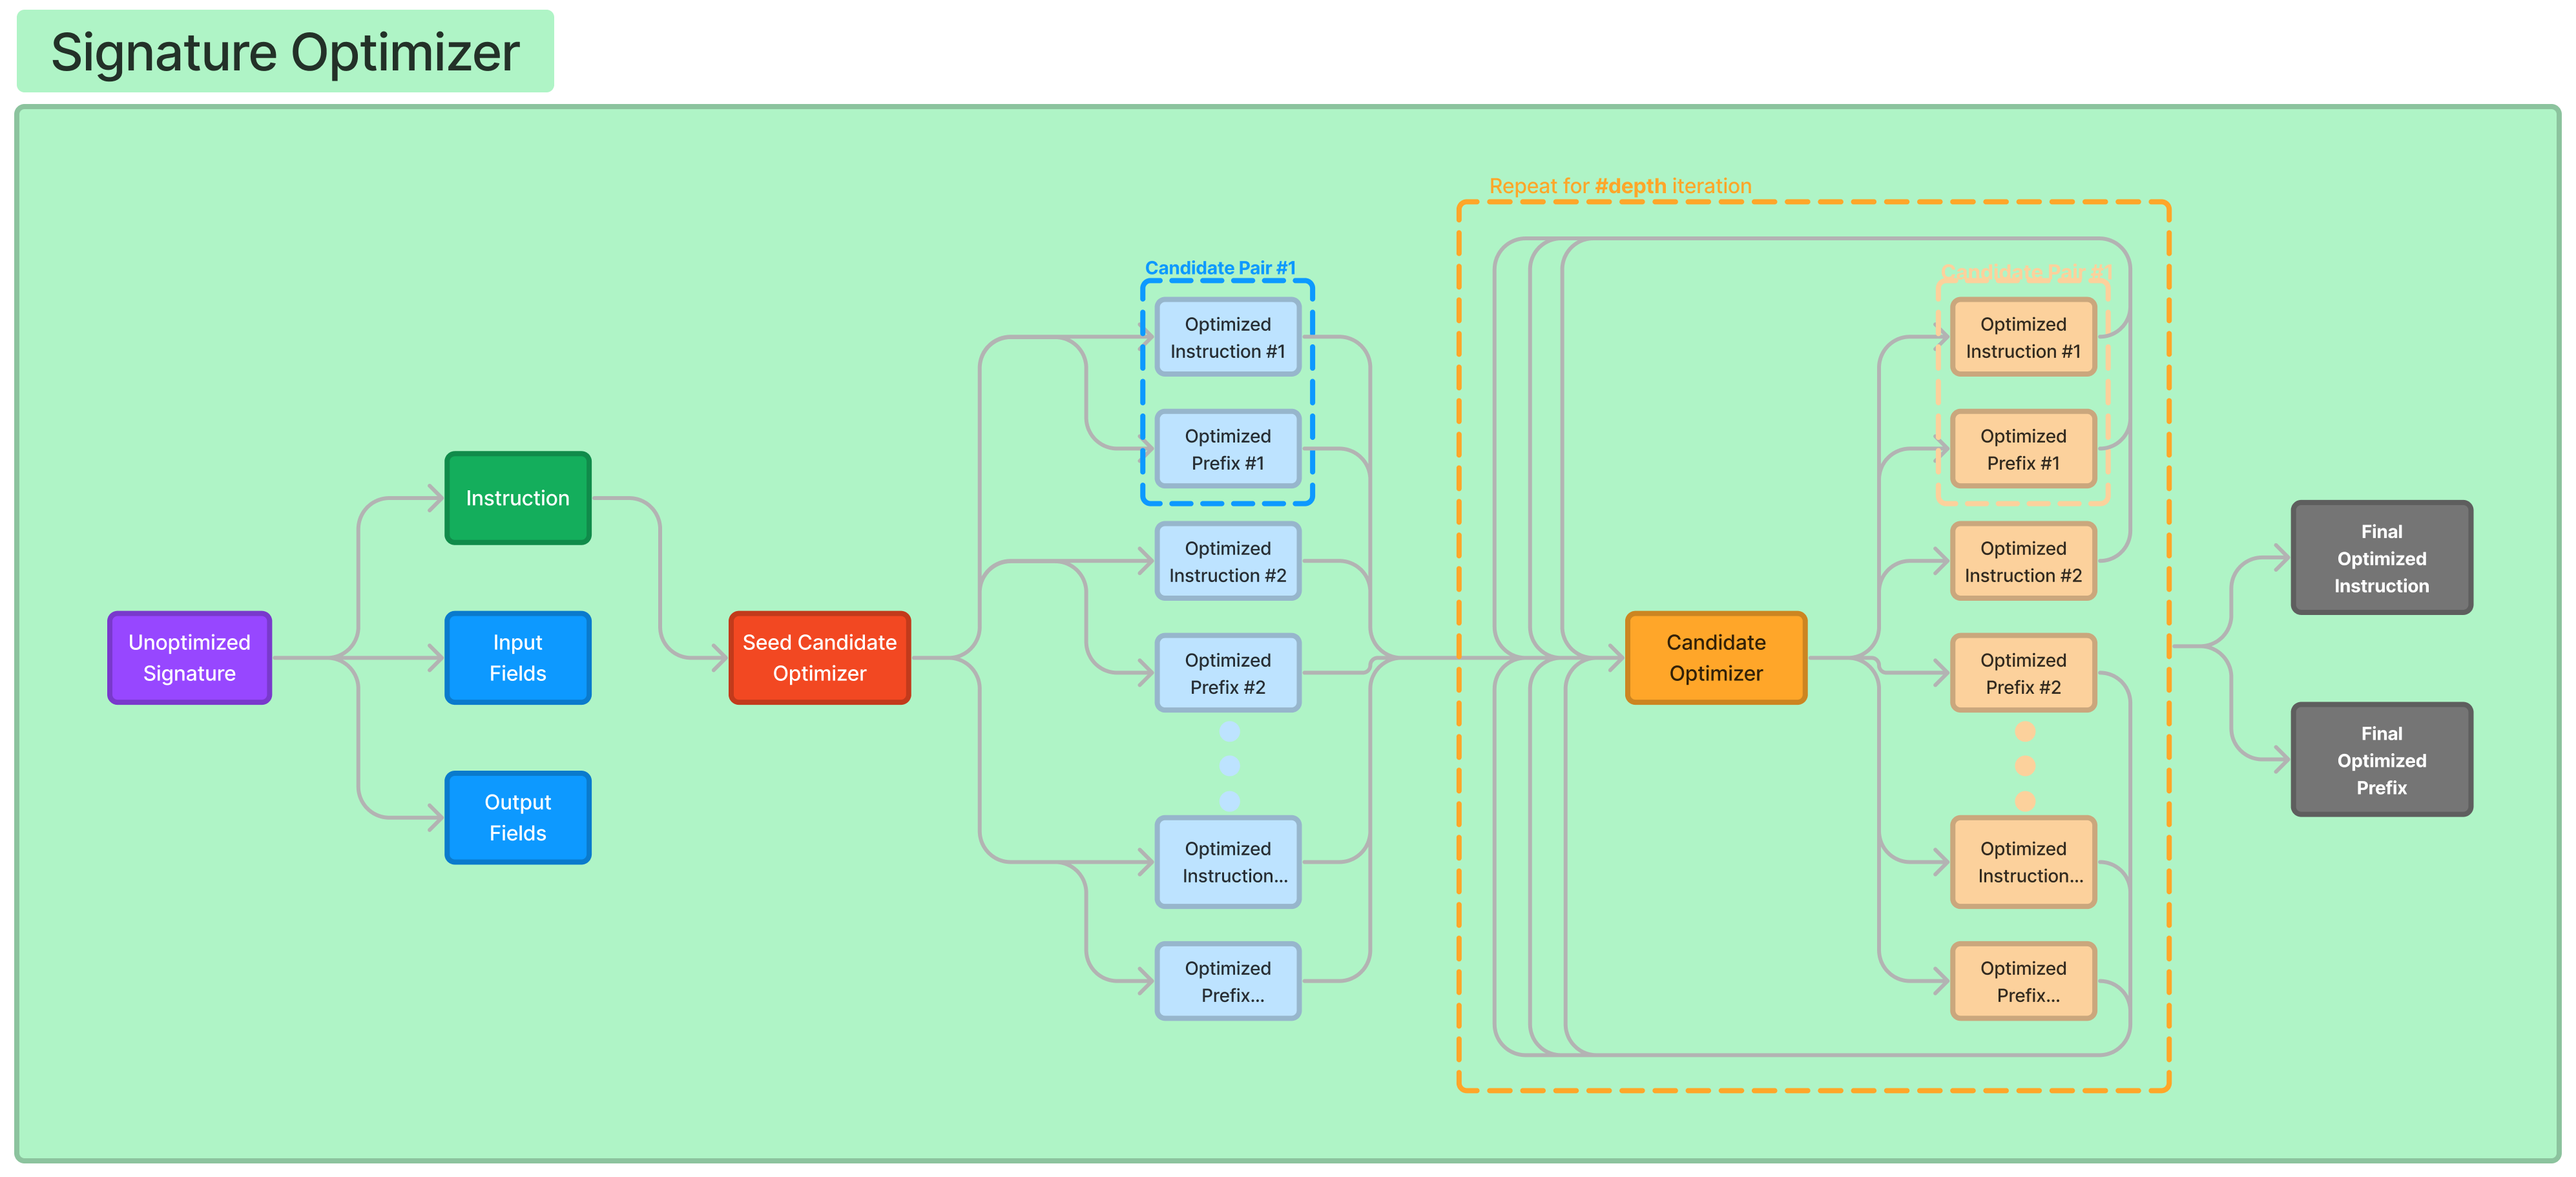

#### Can you tell me what DSPY Asserts & Suggest do?

    They guide the LLMs to provide the output that is required by our application, and our domain specific constraints.

> How the reply must be structured? 

> What the reply must and MUST NOT contain?

> How long is the reply? 

> How well the reply is formed?

### Objective: Top class Reliability, Predictability and Correctness

### Code Execution of Asserts & Suggests

In [1]:
### what are the parameters?
parameters = {"Assert":{
    "parameter":["constraint: Boolean Validation check Outcome",
    "msg: User Defined Error message for correction",
    "backtrack Specifies target module(usually the last) for retry attempts upon failure."
    ],
    "behaviour":["""Initiates retry upon failure, dynamic signature modification of the pipeline.
                 If no improvement, halts.
                 Adds fields like "past_output" that failed validation, "instruction" which is provided 
                 by the user to recover"""],
    "application": "Useful as checkers / gate-keepers in production code"
},
    "Suggest":{
        "parameter":["constraint: Boolean Validation check Outcome",
                     "msg: User Defined Error message for correction",
                     "backtrack Specifies target module(usually the last) for retry attempts upon failure."
                     ],
        "behaviour":["""Encourages self-refinement w/o hardstops, logs failure after 
                     backtracking attempts"""]
                     },
    "application": "Useful as guide or helpers in evaluation phase."
    }

In [ ]:
# How is the Dspy Assert differ from python assert... 
# Refer to TDD video here https://youtu.be/F6NdOaEAugE?si=rxpXovCeOiRfZ_HY

# A small primer on TDD, Red Green Refactor pattern

def add_math(a, b):
    # pass
    return a + b

assert add_math(5, 8) == 13, 'Function fails with Error'
assert add_math(5, 8) == 23, 'Function fails with Error'

In [5]:
# Lets implement Assert in a usecase
from rich import print
import openai
from dotenv import load_dotenv
import os
load_dotenv("D:\gitFolders\python_de_learners_data\.env")
openai.api_key = os.environ['OPENAI_API_KEY']

In [6]:
from dspy import (
    OpenAI,
    OllamaLocal,
    context,
    Signature,
    settings,
    Predict,
    ChainOfThought,
    InputField,
    OutputField,
    Suggest,
    Assert,
    Module
)


d:\dspyenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
gemma_ollama = OllamaLocal(model='gemma:2b',
                            model_type='text',
                            base_url='http://aicontroller:11234',
                            temperature=0.3)

gemma_ollama("Where is paris located")
# https://github.com/ollama/ollama/blob/main/docs/api.md#list-local-models

In [7]:
turbo = OpenAI(model='gpt-3.5-turbo')

In [8]:
len(turbo.history)

0

In [9]:
pred_query = Predict('question -> response')

In [21]:
with context(lm=gemma_ollama):
    output = pred_query(question='Provide me 3 queries about city of paris')

print(output.response)

Question: Provide me 3 queries about city of paris
Response:

* What are the most famous landmarks in Paris?
* What is the history of Paris?
* What are the different neighborhoods in Paris?

In [22]:
gemma_ollama.inspect_history(n=3)





Where is paris located Paris is located in the northeastern part of France, on the Seine River. It is a major city in Europe, known for its rich culture, history, and architecture.







Given the fields `context`, `question`, produce the fields `response`.

---

Follow the following format.

Context: ${context}
Question: ${question}
Response: ${response}

---

Context: {'Assert': {'parameter': ['constraint: Boolean Validation check Outcome', 'msg: User Defined Error message for correction', 'backtrack Specifies target module(usually the last) for retry attempts upon failure.'], 'behaviour': ['Initiates retry upon failure, dynamic adjustment of pipeline.\n                 If no improvement, halts']}, 'Suggest': {'parameter': ['constraint: Boolean Validation check Outcome', 'msg: User Defined Error message for correction', 'backtrack Specifies target module(usually the last) for retry attempts upon failure.'], 'behaviour': ['Encourages self-refinement w/o hardstops, logs failure af

In [10]:
with context(lm=turbo):
    output = pred_query(question='Provide me 3 queries about city of paris')

print(output.response)

Question: Provide me 3 queries about city of Paris
Response: 1. What are the top tourist attractions in Paris?
2. How is the public transportation system in Paris?
3. What are some famous restaurants in Paris known for their cuisine?

In [18]:
# Lists usually have \n char at the EOS
print(output.response.split('\n'))

[
    'Question: Provide me 3 queries about city of Paris',
    'Response: 1. What are the top tourist attractions in Paris?',
    '2. How is the public transportation system in Paris?',
    '3. What are some famous restaurants in Paris known for their cuisine?'
]

In [ ]:
turbo.inspect_history(n=2)

In [11]:
class OnlyResponse(Signature):
    """Reply the question with a list of Replies"""
    question = InputField(desc="This is the question")
    reply = OutputField(desc="Get replies as list")

In [12]:
pred_list = Predict(OnlyResponse)

with context(lm=turbo):
    only_response = pred_list(question="Provide me 3 questions about paris")

In [13]:
# lists usually have a \n char at the end
print(only_response.reply.split('\n'))

[
    '- What are the top attractions to visit in Paris?',
    '- What is the best time of year to visit Paris?',
    '- What are some must-try foods in Paris?'
]

In [18]:
def validate_is_list_of_three(reply):
    make_list = reply.split('\n')
    if len(make_list) == 3:
        return True

In [19]:
# We have seen how the output is created using string signature 
# and saw how it can be improved by modifying the signature 

In [14]:
# Its time we got the LLM to do it, and lets use Modules for it
class GetQuestionAnswer(Module):
    def __init__(self):
        super().__init__()
        self.plain_predict = Predict('topic -> questions')
        self.generate_answer = Predict('question -> short_answers')

    def forward(self, topic):
        answers = []
        raw_reply = self.plain_predict(topic=topic)
        Suggest(validate_is_list_of_three(raw_reply.questions),
                'Reply must be list of 3 questions') 
        question_list = raw_reply.questions.split('\n') 
        for ques in question_list:
            print(f'Question is {ques}')
            got_answer = self.generate_answer(question=ques)
            print(got_answer.short_answers)
            Assert(
                len(got_answer.short_answers) < 75,
                'Answer should contain less than 75 characters'
            )
            answers.append({"Query": ques,
                           "Answer": got_answer.short_answers})
        
        return answers 

In [16]:
settings.configure(lm=turbo)

In [ ]:
question = "Provide me 3 questions about paris"

getqa = GetQuestionAnswer()

answers_from_qa = getqa(topic=question)

In [20]:
len(turbo.history)

5

In [ ]:
turbo.inspect_history(n=5)

In [22]:
# Its time we got the LLM to do it, and lets use Modules for it
class GetQuestionAnswer_suggest(Module):
    def __init__(self):
        super().__init__()
        self.plain_predict = Predict('topic -> questions')
        self.generate_answer = Predict('question -> short_answers')

    def forward(self, topic):
        answers = []
        raw_reply = self.plain_predict(topic=topic)
        Suggest(validate_is_list_of_three(raw_reply.questions),
                'Reply must be list of 3 questions',) 
        question_list = raw_reply.questions.split('\n') 
        for ques in question_list:
            print(f'Question is {ques}')
            got_answer = self.generate_answer(question=ques)
            print(got_answer.short_answers)
            Suggest(
                len(got_answer.short_answers) < 75,
                'Answer should contain less than 75 characters'
            )
            answers.append({"Query": ques,
                           "Answer": got_answer.short_answers})
        
        return answers 

In [23]:
settings.configure(lm=turbo, trace=[], temperature=0.7)

In [ ]:
settings.config

In [ ]:
question = "Provide me 3 questions about paris"

getqa = GetQuestionAnswer_suggest()

answers_from_qa = getqa(topic=question)

In [27]:
len(turbo.history)

7

In [ ]:
turbo.inspect_history(n=7)

In [26]:
from dspy.primitives.assertions import (
    assert_transform_module,
    backtrack_handler
)

In [42]:
import inspect
print(inspect.getsource(backtrack_handler))

def backtrack_handler(func, bypass_suggest=True, max_backtracks=2):
    """Handler for backtracking suggestion and assertion.

    Re-run the latest predictor up to `max_backtracks` times,
    with updated signature if an assertion fails. updated signature adds a new
    input field to the signature, which is the feedback.
    """

    def wrapper(*args, **kwargs):
        error_msg, result = None, None
        with dspy.settings.lock:
            dspy.settings.backtrack_to = None
            dspy.settings.suggest_failures = 0
            dspy.settings.assert_failures = 0

            # Predictor -> List
            dspy.settings.predictor_feedbacks = {}

            current_error = None
            for i in range(max_backtracks + 1):
                if i > 0 and dspy.settings.backtrack_to is not None:
                    # generate values for new fields
                    feedback_msg = _build_error_msg(
                        dspy.settings.predictor_feedbacks
                    )

                    dspy.settings.backtrack_to_args = {
                        "feedback": feedback_msg,
                        "past_outputs": past_outputs,
                    }

                # if last backtrack: ignore suggestion errors
                if i == max_backtracks:
                    if isinstance(current_error, DSPyAssertionError):
                        raise current_error
                    dsp.settings.trace.clear()
                    result = (
                        bypass_suggest_handler(func)(*args, **kwargs)
                        if bypass_suggest
                        else None
                    )
                    break
                else:
                    try:
                        dsp.settings.trace.clear()
                        result = func(*args, **kwargs)
                        break
                    except (DSPySuggestionError, DSPyAssertionError) as e:
                        if not current_error:
                            current_error = e
                        error_id, error_msg, error_target_module, error_state = (
                            e.id,
                            e.msg,
                            e.target_module,
                            e.state[-1],
                        )

                        # increment failure count depending on type of error
                        if isinstance(e, DSPySuggestionError) and e.is_metric:
                            dspy.settings.suggest_failures += 1
                        elif isinstance(e, DSPyAssertionError) and e.is_metric:
                            dspy.settings.assert_failures += 1

                        if dsp.settings.trace:
                            if error_target_module:
                                for i in range(len(dsp.settings.trace) - 1, -1, -1):
                                    trace_element = dsp.settings.trace
                                    mod = trace_element[0]
                                    if mod.signature == error_target_module:
                                        dspy.settings.backtrack_to = mod
                                        break
                            else:
                                dspy.settings.backtrack_to = dsp.settings.trace[-1][0]

                            if dspy.settings.backtrack_to is None:
                                logger.error("Specified module not found in trace")

                            # save unique feedback message for predictor
                            if (
                                error_msg
                                not in dspy.settings.predictor_feedbacks.setdefault(
                                    dspy.settings.backtrack_to, []
                                )
                            ):
                                dspy.settings.predictor_feedbacks[
                                    dspy.settings.backtrack_to
                                ].append(error_msg)

                  

In [61]:
# Lets see what DSPY assert_transformers can do
getqa_with_bt = assert_transform_module(module=GetQuestionAnswer(),
                                        assertion_handler=backtrack_handler,
                                        max_backtracks=2)
# Doesn't Work

In [58]:
from functools import partial

getqa_withbt_1 = assert_transform_module(module=GetQuestionAnswer(),
                                         assertion_handler=partial(backtrack_handler,
                                                                   max_backtracks=1))
# doesn't work

In [29]:
# this work
getqa_with_aa = GetQuestionAnswer().activate_assertions()

In [30]:
# works after giving trace = [] in settings.configure()
getqa_suggest_with_aa = GetQuestionAnswer_suggest().activate_assertions()

In [19]:
# https://colab.research.google.com/github/stanfordnlp/dspy/blob/main/examples/longformqa/longformqa_assertions.ipynb
from dspy.predict import Retry

getqa_retry = assert_transform_module(module=GetQuestionAnswer().map_named_predictors(Retry),
                                      assertion_handler=backtrack_handler)

In [31]:
getqa_with_aa(topic="3 questions about paris")

Question is 1. What are the top attractions to visit in Paris?

1. Eiffel Tower
2. Louvre Museum
3. Notre-Dame Cathedral
4. Montmartre
5. Seine River Cruise

Question is 1. What are the top attractions to visit in Paris?

1. Eiffel Tower, Louvre Museum, Notre-Dame Cathedral, Montmartre, Seine River Cruise

DSPyAssertionError: Answer should contain less than 75 characters

In [32]:
len(turbo.history)

11

In [33]:
turbo.inspect_history(n=11)





Given the fields `question`, produce the fields `response`.

---

Follow the following format.

Question: ${question}
Response: ${response}

---

Question: Provide me 3 queries about city of paris
Response: Question: Provide me 3 queries about city of Paris
Response: 1. What are the top tourist attractions in Paris?
2. How is the public transportation system in Paris?
3. What are some famous restaurants in Paris known for their cuisine?







Reply the question with a list of Replies

---

Follow the following format.

Question: This is the question
Reply: Get replies as list

---

Question: Provide me 3 questions about paris
Reply: - What are the top attractions to visit in Paris?
- What is the best time of year to visit Paris?
- What are some must-try foods in Paris?







Given the fields `topic`, produce the fields `questions`.

---

Follow the following format.

Topic: ${topic}
Questions: ${questions}

---

Topic: Provide me 3 questions about paris
Questions: 1. What are som

In [ ]:
getqa_suggest_with_aa(topic="3 questions about paris")

In [35]:
len(turbo.history)

19

In [36]:
turbo.inspect_history(n=19)





Given the fields `question`, produce the fields `response`.

---

Follow the following format.

Question: ${question}
Response: ${response}

---

Question: Provide me 3 queries about city of paris
Response: Question: Provide me 3 queries about city of Paris
Response: 1. What are the top tourist attractions in Paris?
2. How is the public transportation system in Paris?
3. What are some famous restaurants in Paris known for their cuisine?







Reply the question with a list of Replies

---

Follow the following format.

Question: This is the question
Reply: Get replies as list

---

Question: Provide me 3 questions about paris
Reply: - What are the top attractions to visit in Paris?
- What is the best time of year to visit Paris?
- What are some must-try foods in Paris?







Given the fields `topic`, produce the fields `questions`.

---

Follow the following format.

Topic: ${topic}
Questions: ${questions}

---

Topic: Provide me 3 questions about paris
Questions: 1. What are som

In [ ]:
settings.config